# Enter Student Name & ID

In [1]:
student_id = 99106403  #@param {type:"integer"}
student_name = "Mehdi Abbaszadeh" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99106403
your name: Mehdi Abbaszadeh


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [53]:
def myPCA(X, num_components):
    #
    # Complete
    #
    zero_mean_X = X - np.mean(X, axis=0)
    covariance_mat = np.cov(zero_mean_X.T)
    # eigh retuen a sorted rigen_values (from lowest to biggest) and corresponding normalized eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_mat)

    # Select the top num_components eigenvectors
    new_basis = eigenvectors[: , -1:-num_components - 1 : -1]
    # Transform the data
    X_reduced = np.dot(zero_mean_X, new_basis)
    return X_reduced

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

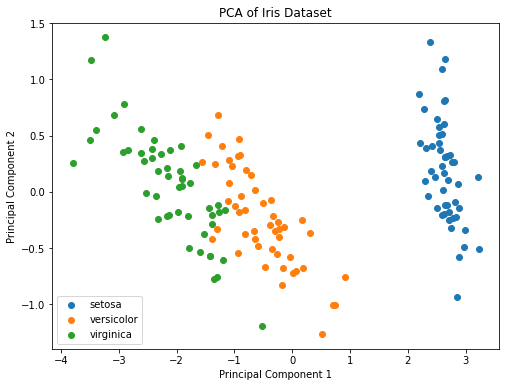

In [55]:
# myPCA on IRIS
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Number of principal components
n_components = 2
X_reduced = myPCA(X, n_components)
# Plot the reduced data
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(X_reduced[y == target, 0], X_reduced[y == target, 1], label=iris.target_names[target])
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
Eigenfaces are the eigenvectors of the covariance matrix of the set of face images. When the face images are represented as vectors, these eigenvectors capture the primary components or features that vary among the images.
Each eigenface can be viewed as a template that highlights certain facial features. When combined linearly, they can represent any face in the dataset.
PCA reduces the dimensionality of the face image data by projecting it onto a lower-dimensional space defined by the eigenfaces. This reduces the computational complexity and storage requirements while retaining the most significant features.
By projecting face images onto the space spanned by the eigenfaces, each face is represented by a small set of weights. These weights can then be used for comparing and recognizing faces, making the recognition process efficient and robust.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

In [70]:
import os
import cv2
import numpy as np

main_folder = 'ORL'
num_individuals = 40
num_images_per_individual = 10

X_train, y_train, X_test, y_test = [], [], [], []

for i in range(1, num_individuals + 1):
    folder_path = os.path.join(main_folder, f's{i}')
    
    for j in range(1, 6):
        img_path = os.path.join(folder_path, f'{j}.bmp')
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        y_train.append(i - 1)

    for j in range(6, 11):
        img_path = os.path.join(folder_path, f'{j}.bmp')
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        X_test.append(img)
        y_test.append(i - 1)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (200, 48, 48)
y_train shape: (200,)
X_test shape: (200, 48, 48)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [71]:
from sklearn.decomposition import PCA
num_componenets = 45
# Flatten the images
n_samples, h, w = X_train.shape
X_train_flattened = X_train.reshape(n_samples, h * w)

n_samples_test, h_test, w_test = X_test.shape
X_test_flattened = X_test.reshape(n_samples_test, h_test * w_test)
pca = PCA(num_componenets)

# Fit PCA on training data and transform both training and testing data
X_train_reduced = pca.fit_transform(X_train_flattened)
X_test_reduced = pca.transform(X_test_flattened)

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(X_train_reduced, y_train )

# Predict on the test set
y_pred = lda.predict(X_test_reduced)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("LDA Classifier Accuracy:", accuracy)

LDA Classifier Accuracy: 0.92


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [81]:
for n in np.arange(1, 101):
    pca = PCA(n)
    X_train_reduced = pca.fit_transform(X_train_flattened)
    X_test_reduced = pca.transform(X_test_flattened)
    
    lda = LDA()
    lda.fit(X_train_reduced, y_train )

    # Predict on the test set
    y_pred = lda.predict(X_test_reduced)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Number of PCA components: {n}, LDA Classifier Accuracy: {accuracy}")

Number of PCA components: 1, LDA Classifier Accuracy: 0.1
Number of PCA components: 2, LDA Classifier Accuracy: 0.185
Number of PCA components: 3, LDA Classifier Accuracy: 0.325
Number of PCA components: 4, LDA Classifier Accuracy: 0.47
Number of PCA components: 5, LDA Classifier Accuracy: 0.59
Number of PCA components: 6, LDA Classifier Accuracy: 0.625
Number of PCA components: 7, LDA Classifier Accuracy: 0.725
Number of PCA components: 8, LDA Classifier Accuracy: 0.74
Number of PCA components: 9, LDA Classifier Accuracy: 0.75
Number of PCA components: 10, LDA Classifier Accuracy: 0.775
Number of PCA components: 11, LDA Classifier Accuracy: 0.83
Number of PCA components: 12, LDA Classifier Accuracy: 0.83
Number of PCA components: 13, LDA Classifier Accuracy: 0.845
Number of PCA components: 14, LDA Classifier Accuracy: 0.86
Number of PCA components: 15, LDA Classifier Accuracy: 0.89
Number of PCA components: 16, LDA Classifier Accuracy: 0.885
Number of PCA components: 17, LDA Classifie

In [84]:
###Answer:
# varying from 40 to 100 features can not show the real sufficient feature value. instead, as you can see above, i changed the
# features from 1 to 100, and it can be understood that 32 features have the best accuracy. the interesting point besides the 
# fact that below 30, there is a significant reduction in accuracy is that there are also for large number of features
# a small decrease in accuracy as you see above.